In [94]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


In [95]:
data= pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv")
data.head(10)


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0
5,2/22/2010,0.0,2098150.0,0.0,0.0,0.0,0.000384,0,1.0,0.0,0.000032,2.527738,0.0,0.0,65.214056,0.0,262,261,42361,261,261,32350.00,19551.0,0.0
6,2/23/2010,0.0,2110700.0,0.0,0.0,0.0,0.000216,0,1.0,0.0,0.000031,2.527738,0.0,0.0,25100.000000,0.0,252,252,42613,252,252,12600.00,50.0,0.0
7,2/24/2010,0.0,2120200.0,0.0,0.0,0.0,0.000282,0,1.0,0.0,0.000036,3.781179,0.0,0.0,179.245283,0.0,195,196,42809,196,196,14800.00,5300.0,0.0
8,2/25/2010,0.0,2127600.0,0.0,0.0,0.0,0.000227,0,1.0,0.0,0.000028,3.781179,0.0,0.0,1057.142857,0.0,150,150,42959,150,150,8100.00,700.0,0.0
9,2/26/2010,0.0,2136100.0,0.0,0.0,0.0,0.000319,0,1.0,0.0,0.000032,3.781179,0.0,0.0,64.582059,0.0,176,176,43135,176,176,29349.00,13162.0,0.0


In [96]:
data.shape

(2906, 24)

In [97]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,2.890000e+03,2.906000e+03,2896.000000,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,1.606360e+11,2.184353e+06,60.434503,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,3.725159e+11,5.669939e+06,117.737162,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,2.527738e+00,0.000000e+00,0.000000,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,1.591075e+06,4.659125e+04,9.472422,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,2.193848e+09,8.716363e+05,20.415194,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,1.130000e+11,1.827683e+06,49.627982,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,2.600000e+12,5.319158e+07,1495.946477,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [98]:
data.isnull().any()

Date                                                   False
btc_market_price                                       False
btc_total_bitcoins                                      True
btc_market_cap                                         False
btc_trade_volume                                        True
btc_blocks_size                                         True
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                            True
btc_hash_rate                                          False
btc_difficulty                                          True
btc_miners_revenue                                     False
btc_transaction_fees                                    True
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses  

In [99]:
data.fillna(data.mean(), inplace=True)

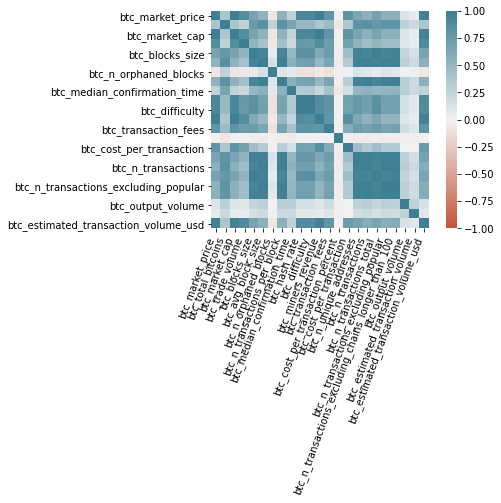

In [100]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);

In [101]:
index = [0]
labels = list(data['Date'])
last_seen = ['2010']
for i in range(len(labels)):
    labels[i] = labels[i].split('-')[0]
    if labels[i] != last_seen[-1]:
        last_seen.append(labels[i])
        index.append(i)

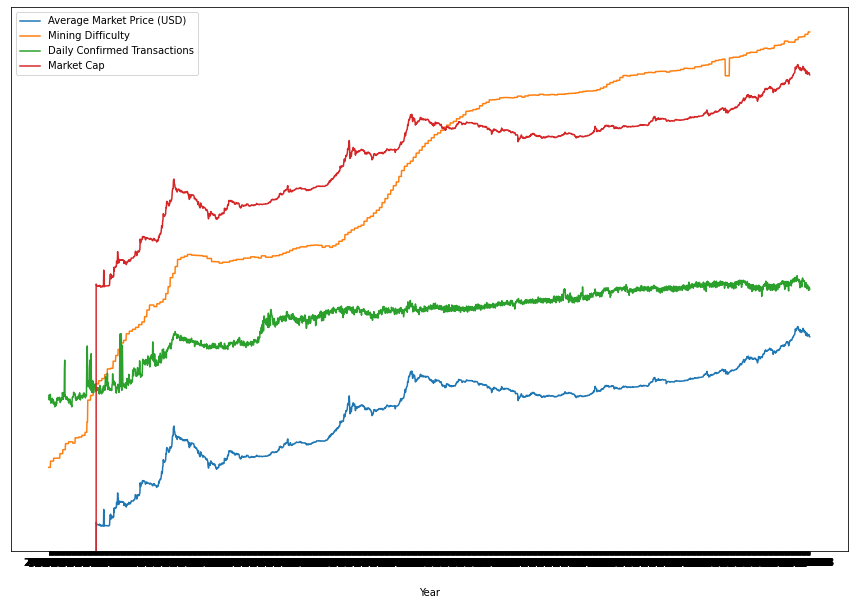

In [102]:
plt.plot(data['btc_market_price'], label='Average Market Price (USD)')
plt.plot(data['btc_difficulty'], label='Mining Difficulty')
plt.plot(data['btc_n_transactions'], label='Daily Confirmed Transactions')
plt.plot(data['btc_market_cap'], label='Market Cap')
plt.gca().set_yscale("log")
plt.yticks([])
plt.xticks(index, last_seen)
plt.xlabel('Year', labelpad=20)
plt.gcf().set_size_inches(15, 10)
plt.legend()
plt.show()


In [103]:
data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [104]:
y=data.btc_market_price
chosen_cols=['btc_market_cap','btc_n_transactions','btc_cost_per_transaction','btc_miners_revenue','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']
X=data[chosen_cols]
X.head()

,btc_market_cap,btc_n_transactions,btc_cost_per_transaction,btc_miners_revenue,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [105]:
X.isnull().sum()

btc_market_cap                      0
btc_n_transactions                  0
btc_cost_per_transaction            0
btc_miners_revenue                  0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
dtype: int64

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [107]:
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.3, random_state=1)


In [108]:
data_model=LinearRegression(n_jobs=-1)

data_model.fit(train_X,train_y)

predicted_data=data_model.predict(val_X)

data_mae=mean_absolute_error(val_y,predicted_data)
print(data_mae)

13.425109976892807


In [109]:
print(predicted_data)

[ 5.89940572e+02  1.45108164e+02  2.43043152e+03  1.16213413e+01
  4.62295337e+02 -1.23837634e+01  1.22872037e+01  4.70510074e+02
  6.45630082e+00  1.17621718e+01  9.41316419e+00  1.23220530e+03
 -1.24110507e+01 -9.93342288e+00  2.92721931e+02  2.55139450e+02
  5.55453023e+02  3.90221343e+02  1.54775591e+01  6.18230620e+01
 -4.81976778e+00  2.48427490e+01  1.50975400e+01  4.21697469e+02
  1.09378951e+02  2.53718312e+02  4.39661163e+00 -1.24577239e+01
  1.37317317e+01 -8.86122310e+00  2.53476242e+03  2.52544727e+03
  6.15924398e+02  2.31109470e+00  8.02462974e+03  2.11382440e+00
  3.64429042e+02  3.93120634e+03 -1.24359733e+01  2.19284567e+02
  3.36581883e+02  2.43787122e+02  7.40832820e+02  2.33687142e+02
  1.25522804e+03 -4.85419782e+00  5.96396849e+02  1.07056091e+02
  2.96683590e+02  1.39694521e+01  5.67276669e+00  5.94335119e+02
  1.08878147e+03  1.76386070e+02  8.79150070e+02  2.71462269e+02
  1.49111821e+01  7.76781236e+03  1.05419328e+03  2.68639386e+02
  1.51245300e+01  4.67268

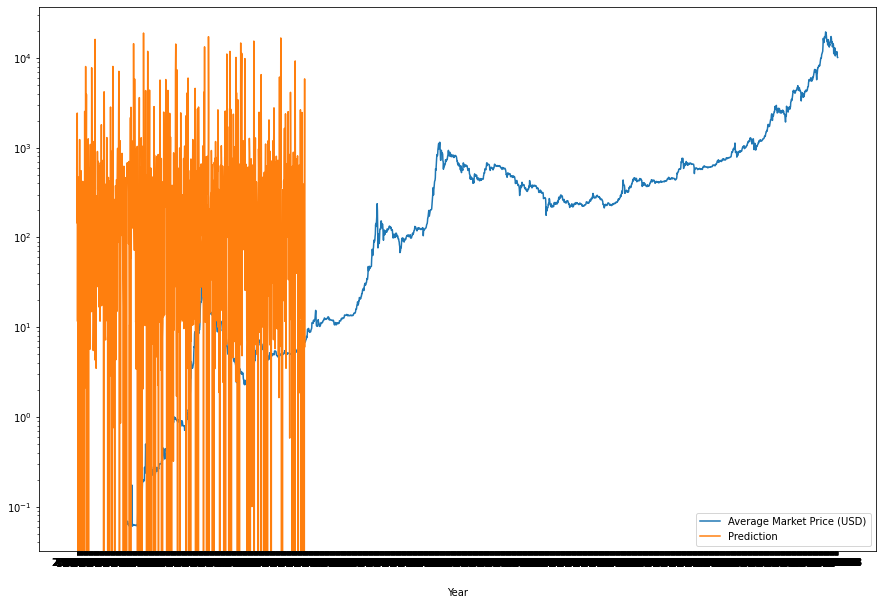

In [110]:
plt.plot(data['btc_market_price'], label='Average Market Price (USD)')
plt.plot(predicted_data, label='Prediction')
plt.gca().set_yscale("log")
plt.xticks(index, last_seen)
plt.xlabel('Year', labelpad=20)
plt.gcf().set_size_inches(15, 10)
plt.legend()
plt.show()